# The diminishing returns of long exposures in observations

You might have heard from observers sometimes that if you increase your observation's exposure time by a factor of $2$, you'll only gain a factor of $\sqrt{2}$ in sensitivity.

This notebook is aimed to shed light on that, demonstrating it in a simple example and showing the mathematical background.

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from matplotlib import rc

# font setting, you can set uselatex=False
rc('text', usetex=True)
rc('font', **{'family' : 'serif'})
    
# A sequentially-uniform and color-vision friendly color palette from CubeHelix
colorset = ['#000000', '#00270C', '#00443C', '#005083', 
            '#034BCA', '#483CFC', '#9C2BFF', '#EB24F4', 
            '#FF2DC2', '#FF4986', '#FF7356', '#FFA443', 
            '#EBD155', '#D3F187', '#D7FFC8', '#FFFFFF']

## Computational demonstration

### The "truth"
Imaging a 1-dimensional signal in flux as a function of variable $x$ (which may be wavelength/frequency, time, spatial coordinate, etc.):
$$ F_{\rm{signal}}(x) = \frac{1}{0.001+(x-5)^2} $$

This arbitrary function is simply a representative of a "spiky" signal. Could be a source in an image or a spectral line on top of a continuum.

We'll define $F_{\rm{signal}}(x)$ in this notebook by python function `signal(x)`

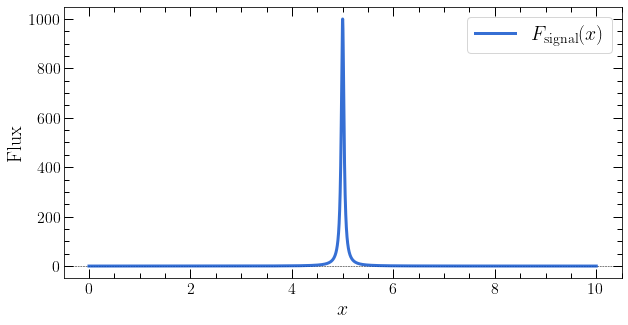

In [2]:
def signal(x):
    return 1 / (0.001 + (x-5)**2)

# Calculating
TEST_X = np.linspace(0,10,10000)
SIGNAL = signal(TEST_X)

# plotting
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.axhline(0,linestyle='--',color='k',linewidth=0.5)
ax.plot(TEST_X, SIGNAL, label=r'$F_{\rm{signal}}(x)$',lw=3,alpha=0.8,color=colorset[4])
ax.legend(fontsize=20)
ax.set_xlabel('$x$',fontsize=20)
ax.set_ylabel('Flux',fontsize=20)
ax.minorticks_on()
ax.tick_params('both', length=9, width=1, which='major')
ax.tick_params('both', length=5, width=1, which='minor')
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='both',direction='in',right=True,top=True)

### The observation

Now, let's say we are attempting to observe our spiky signal with some detector or observatory. Our telescope/instrument and all that's contributing to it will have some noise. Vaguely, let's assume nominal observing configuration and conditions, which would imply instrument noise is not unusual. Telescope/instrument documentation indicates that if all data acquisition and reduction has gone nominally, the noise at each "pixel" (i.e., specific values of $x$ at which we are measuring flux) should follow a normal distribution with a mean of $\mu=0$ and a standard deviation of $\sigma=1000$, where the value of $\sigma$ is specifically for the exposure time of our observation.

So we define the noise function as:
$$ F_{\rm{noise}}(x) \sim \mathcal{N}(\mu=0,\sigma=1000) $$

Which has no dependence on $x$ and is thus at every pixel just a random realization from a normal distribution with a mean of 0 and a standard deviation of 1000. The symbol $\sim$ means "distributed as".

With that, our total observed flux as a function of $x$ will be:

$$ F_{\rm{observation}}(x) = F_{\rm{signal}}(x) + F_{\rm{noise}}(x) = \frac{1}{0.001+(x-5)^2} + F_{\rm{noise}}(x) $$

I denote observed quantities with a $~\hat{}~$ (to distinguish from what we get from the theory). We observe a total of $N$ points along the $x$: 

$$\hat{\bf{x}} = [\hat{x}_i]\quad\text{for}\quad i=1,\cdots,N $$

$$\hat{\bf{F}} = [\hat{F}_i]\quad\text{for}\quad i=1,\cdots,N $$

We'll define $F_{\rm{observation}}(x)$ in this notebook by python function `observe(x)` and then make observations of flux at specific values of $x$, where `TEST_X` will represent $\hat{\bf{x}}$ and `OBSERVATION` will represent $\hat{\bf{F}}$.

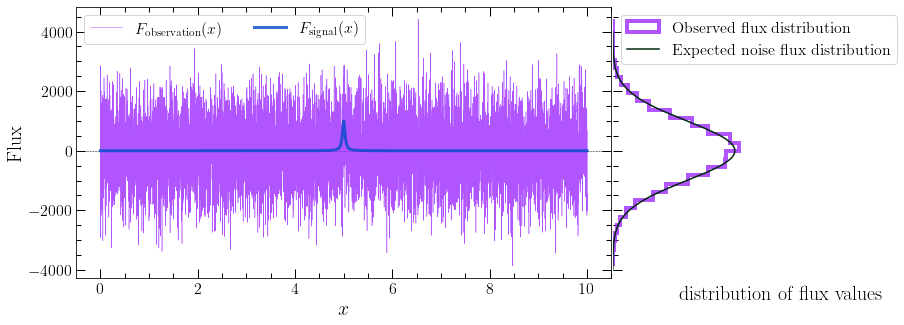

In [3]:
def observe(x, noise_sd = 1000):
    return signal(x) + st.norm(0,noise_sd).rvs(size=x.shape)

OBSERVATION = observe(TEST_X)

# Just to make a theoretical curve for the noise distribution
TEST_FLUX = np.linspace(-4000,4000,10000)

# Plotting
fig = plt.figure(figsize=(12,5))
ax1 = plt.subplot2grid([1,5],[0,0],colspan=4,fig=fig)
ax1.axhline(0,linestyle='--',color='k',linewidth=0.5)
ax1.plot(TEST_X, OBSERVATION, label=r'$F_{\rm{observation}}(x)$',lw=0.5,alpha=0.8,color=colorset[6])
ax1.plot(TEST_X, SIGNAL, label=r'$F_{\rm{signal}}(x)$',lw=3,alpha=0.8,color=colorset[4])
ax1.legend(fontsize=16,ncol=2,loc=2)
ax1.set_xlabel('$x$',fontsize=20)
ax1.set_ylabel('Flux',fontsize=20)
ax1.minorticks_on()
ax1.tick_params('both', length=9, width=1, which='major')
ax1.tick_params('both', length=5, width=1, which='minor')
ax1.tick_params(axis='both', which='major', labelsize=16)
ax1.tick_params(axis='both', which='both',direction='in',right=True,top=True)
ax2 = plt.subplot2grid([1,5],[0,4],fig=fig)
ax2.hist(OBSERVATION,bins=30,orientation='horizontal',color=colorset[6],histtype='step',alpha=0.8,linewidth=4,density=True, label='Observed flux distribution')
ax2.plot(st.norm(0,1000).pdf(TEST_FLUX),TEST_FLUX,color=colorset[1], label='Expected noise flux distribution')
ax2.legend(fontsize=16,ncol=1,loc=2)
ax2.set_ylim(ax1.get_ylim())
ax2.set_xlabel('distribution of flux values',fontsize=20,ha='left')
ax2.minorticks_on()
ax2.tick_params('both', length=9, width=1, which='major')
ax2.tick_params('both', length=5, width=1, which='minor')
ax2.tick_params(axis='both', which='major', labelsize=16)
ax2.tick_params(axis='both', which='both',direction='in',right=False,top=False,bottom=False)
ax2.spines[:].set_visible(False)
ax2.set_xticklabels([]);
ax2.set_yticklabels([]);

fig.subplots_adjust(wspace=0.01)

Let's estimate the standard deviation in $\hat{\bf{F}}$ outside the range where we expect our spike signal would make an appearance $x\approx[4,6]$:

In [4]:
print('standard deviation of Observed flux values:',np.std(OBSERVATION[(TEST_X<4) | (TEST_X>6)]))

standard deviation of Observed flux values: 998.6663987406577


This value is close to what we had from the theoretical expectation for $F_{\rm{observation}}(x)$.

### stacking and diminishing returns

Now, as you can see in the plot above, the noise in our observation is too high for us to see any signature of our spiky signal. Let's assume that we decide to increase the length of our observation by a factor of 4 (or equivalently, perform it 4 times instead of just once) and then stack/average the observations to form $F_{\rm{stack}}(x)$.

I define `stacking_obs(x)` as a function for this: 

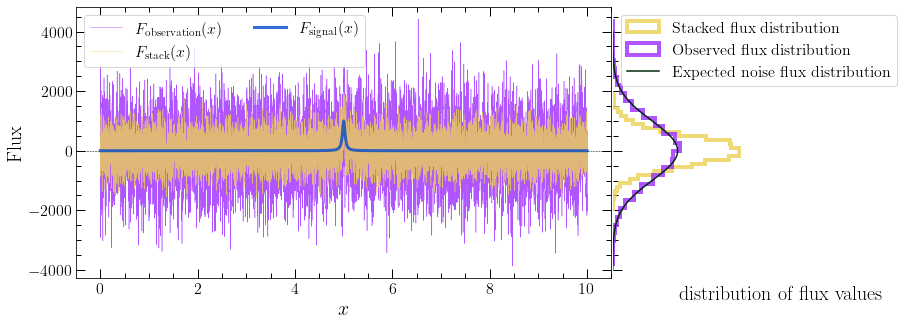

In [5]:
def stacking_obs(x, num_obs = 4):
    stack = np.zeros_like(x)
    for i in range(num_obs):
        stack += observe(x)
    return stack/num_obs


STACKED_OBS = stacking_obs(TEST_X)

# Just to make a theoretical curve for the noise distribution
TEST_FLUX = np.linspace(-4000,4000,10000)

# Plotting
fig = plt.figure(figsize=(12,5))
ax1 = plt.subplot2grid([1,5],[0,0],colspan=4,fig=fig)
ax1.axhline(0,linestyle='--',color='k',linewidth=0.5)
ax1.plot(TEST_X, OBSERVATION, label=r'$F_{\rm{observation}}(x)$',lw=0.5,alpha=0.8,color=colorset[6])
ax1.plot(TEST_X, STACKED_OBS, label=r'$F_{\rm{stack}}(x)$',lw=0.5,alpha=0.8,color=colorset[12])
ax1.plot(TEST_X, SIGNAL, label=r'$F_{\rm{signal}}(x)$',lw=3,alpha=0.8,color=colorset[4])
ax1.legend(fontsize=16,ncol=2,loc=2)
ax1.set_xlabel('$x$',fontsize=20)
ax1.set_ylabel('Flux',fontsize=20)
ax1.minorticks_on()
ax1.tick_params('both', length=9, width=1, which='major')
ax1.tick_params('both', length=5, width=1, which='minor')
ax1.tick_params(axis='both', which='major', labelsize=16)
ax1.tick_params(axis='both', which='both',direction='in',right=True,top=True)
ax2 = plt.subplot2grid([1,5],[0,4],fig=fig)
ax2.hist(STACKED_OBS,bins=30,orientation='horizontal',color=colorset[12],histtype='step',alpha=0.8,linewidth=4,density=True, label='Stacked flux distribution')
ax2.hist(OBSERVATION,bins=30,orientation='horizontal',color=colorset[6],histtype='step',alpha=0.8,linewidth=4,density=True, label='Observed flux distribution')
ax2.plot(st.norm(0,1000).pdf(TEST_FLUX),TEST_FLUX,color=colorset[1], label='Expected noise flux distribution')
ax2.legend(fontsize=16,ncol=1,loc=2)
ax2.set_ylim(ax1.get_ylim())
ax2.set_xlabel('distribution of flux values',fontsize=20,ha='left')
ax2.minorticks_on()
ax2.tick_params('both', length=9, width=1, which='major')
ax2.tick_params('both', length=5, width=1, which='minor')
ax2.tick_params(axis='both', which='major', labelsize=16)
ax2.tick_params(axis='both', which='both',direction='in',right=False,top=False,bottom=False)
ax2.spines[:].set_visible(False)
ax2.set_xticklabels([]);
ax2.set_yticklabels([]);

fig.subplots_adjust(wspace=0.01)

In [6]:
print('standard deviation of observed flux values in a single observation:\t',np.std(OBSERVATION[(TEST_X<4) | (TEST_X>6)]))
print('standard deviation of observed flux values in a stack of 4 observations:',np.std(STACKED_OBS[(TEST_X<4) | (TEST_X>6)]))

standard deviation of observed flux values in a single observation:	 998.6663987406577
standard deviation of observed flux values in a stack of 4 observations: 501.08718924561


So, we increased our observations by a factor of **4** but our noise went down by a factor of **2** (corresponding to $\sqrt{4}$).

And we can see this at higher rates too, let's increase our number of observations by a factor of 100:

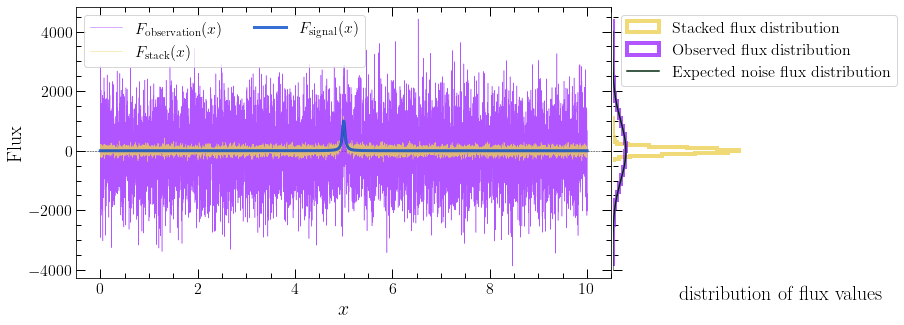

In [7]:
STACKED_OBS = stacking_obs(TEST_X, num_obs=100)

# Just to make a theoretical curve for the noise distribution
TEST_FLUX = np.linspace(-4000,4000,10000)

# Plotting
fig = plt.figure(figsize=(12,5))
ax1 = plt.subplot2grid([1,5],[0,0],colspan=4,fig=fig)
ax1.axhline(0,linestyle='--',color='k',linewidth=0.5)
ax1.plot(TEST_X, OBSERVATION, label=r'$F_{\rm{observation}}(x)$',lw=0.5,alpha=0.8,color=colorset[6])
ax1.plot(TEST_X, STACKED_OBS, label=r'$F_{\rm{stack}}(x)$',lw=0.5,alpha=0.8,color=colorset[12])
ax1.plot(TEST_X, SIGNAL, label=r'$F_{\rm{signal}}(x)$',lw=3,alpha=0.8,color=colorset[4])
ax1.legend(fontsize=16,ncol=2,loc=2)
ax1.set_xlabel('$x$',fontsize=20)
ax1.set_ylabel('Flux',fontsize=20)
ax1.minorticks_on()
ax1.tick_params('both', length=9, width=1, which='major')
ax1.tick_params('both', length=5, width=1, which='minor')
ax1.tick_params(axis='both', which='major', labelsize=16)
ax1.tick_params(axis='both', which='both',direction='in',right=True,top=True)
ax2 = plt.subplot2grid([1,5],[0,4],fig=fig)
ax2.hist(STACKED_OBS,bins=30,orientation='horizontal',color=colorset[12],histtype='step',alpha=0.8,linewidth=4,density=True, label='Stacked flux distribution')
ax2.hist(OBSERVATION,bins=30,orientation='horizontal',color=colorset[6],histtype='step',alpha=0.8,linewidth=4,density=True, label='Observed flux distribution')
ax2.plot(st.norm(0,1000).pdf(TEST_FLUX),TEST_FLUX,color=colorset[1], label='Expected noise flux distribution')
ax2.legend(fontsize=16,ncol=1,loc=2)
ax2.set_ylim(ax1.get_ylim())
ax2.set_xlabel('distribution of flux values',fontsize=20,ha='left')
ax2.minorticks_on()
ax2.tick_params('both', length=9, width=1, which='major')
ax2.tick_params('both', length=5, width=1, which='minor')
ax2.tick_params(axis='both', which='major', labelsize=16)
ax2.tick_params(axis='both', which='both',direction='in',right=False,top=False,bottom=False)
ax2.spines[:].set_visible(False)
ax2.set_xticklabels([]);
ax2.set_yticklabels([]);

fig.subplots_adjust(wspace=0.01)

In [8]:
print('standard deviation of observed flux values in a single observation:\t',np.std(OBSERVATION[(TEST_X<4) | (TEST_X>6)]))
print('standard deviation of observed flux values in a stack of 100 observations:',np.std(STACKED_OBS[(TEST_X<4) | (TEST_X>6)]))

standard deviation of observed flux values in a single observation:	 998.6663987406577
standard deviation of observed flux values in a stack of 100 observations: 99.77932270777042


So we get the law of diminishing returns on observational exposures: longer exposures only improve your sensitivity by square root of your fractional increment in exposure.

Now, the question is why is this happening? let's get to the mathematics of it.

## Mathematical explanation
Our observations above can be considered independent as the realization of one does not affect the probability/flux distribution of the other ones (we are making the assumption that things are not varying with time). So, let's say we have taken $M$ observations:

$$\displaystyle \hat{F}_{\rm{stack}} = \frac{1}{M} \sum_{k=1}^{M} \hat{F}_{\rm{obs},k}$$

and we want to calculate the standard deviation ($\hat{\sigma}_{\rm{stack}}$). We'll start by calculating variance ($\hat{\sigma}_{\rm{stack}}^2$):

$$ \hat{\sigma}_{\rm{stack}}^2 = \langle \hat{F}_{\rm{stack}}^2 \rangle - \langle \hat{F}_{\rm{stack}}\rangle^2 $$

where $\langle \rangle$ indicates [expected value](https://en.wikipedia.org/wiki/Expected_value). We have:

$$ 
\begin{array}{rl}
\langle \hat{F}_{\rm{stack}}^2 \rangle &= \frac{1}{M^2} \langle \hat{F}_{\rm{obs},1}^2 + \cdots +\hat{F}_{\rm{obs},M}^2 + \hat{F}_{\rm{obs},1}\hat{F}_{\rm{obs},2} + \hat{F}_{\rm{obs},2}\hat{F}_{\rm{obs},1} + \hat{F}_{\rm{obs},1}\hat{F}_{\rm{obs},3} + \cdots\rangle\\
\\
&= \frac{1}{M^2} \left( \langle \hat{F}_{\rm{obs},1}^2\rangle + \cdots +\langle \hat{F}_{\rm{obs},M}^2\rangle + \langle \hat{F}_{\rm{obs},1}\hat{F}_{\rm{obs},2} \rangle + \langle \hat{F}_{\rm{obs},1}\hat{F}_{\rm{obs},3}  \rangle + \cdots \right)
\end{array}$$

Since observations are independent of each other and each have the same noise behavior:

$$ \langle \hat{F}_{\rm{obs},1}\hat{F}_{\rm{obs},2} \rangle = \langle \hat{F}_{\rm{obs},1}\hat{F}_{\rm{obs},3} \rangle = \cdots = \langle \hat{F}_{\rm{obs},1} \rangle \langle \hat{F}_{\rm{obs},2} \rangle = \langle \hat{F}_{\rm{obs},1} \rangle^2 $$

And there are $M(M-1)$ of these terms, so:

$$ \langle \hat{F}_{\rm{stack}}^2 \rangle = \frac{1}{M^2} \left( M \langle \hat{F}_{\rm{obs},1}^2 \rangle + M(M-1)\langle \hat{F}_{\rm{obs},1} \rangle^2 \right)$$

$$ \hat{\sigma}_{\rm{stack}}^2 = \langle \hat{F}_{\rm{stack}}^2 \rangle - \langle \hat{F}_{\rm{stack}} \rangle^2 = \frac{1}{M^2} \left( M \langle \hat{F}_{\rm{obs},1}^2 \rangle + M(M-1)\langle \hat{F}_{\rm{obs},1} \rangle^2 - M^2 \langle \hat{F}_{\rm{obs},1} \rangle ^2 \right) = \frac{1}{M} \hat{\sigma}_{\rm{obs}}^2$$

and thus:

$$ \hat{\sigma}_{\rm{stack}} = \frac{1}{\sqrt{M}} \hat{\sigma}_{\rm{obs}} $$

Which indicates that if we are stacking $M$ observations, our standard deviation (of noise) goes down by a factor of $\sqrt{M}$, hence the diminishing return.

## Theoretical background: Central limit theorem

Typically, for these kind of snippets and explainers, we start from the theoretical backgrounds and built to the specific case. However, here it was appropriate to go from the specific context to the background theory. So with all that, all of the above fall under a very important theorem of statistics, known as the central limit theorem. There are a few fantastic resources on this theorem that I encourage you to look into:

- For the basic definition: [Wikipedia](https://en.wikipedia.org/wiki/Central_limit_theorem)
- For an interactive demonstration: [Seeing theory](https://seeing-theory.brown.edu/probability-distributions/index.html#section3)
- For a wonderful visual explainer: [3Blue1Brown: But what is the Central Limit Theorem?](https://www.youtube.com/watch?v=zeJD6dqJ5lo)